To load the dataset from tenserflow

---



In [ ]:
!pip install -q tfds-nightly tensorflow matplotlib

     |████████████████████████████████| 3.9MB 17.6MB/s 


Import the Libraries

---



In [ ]:
# Import the libraries

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2

import tensorflow_datasets as tfds
#importing the model
from keras.models import Sequential
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout, BatchNormalization

In [ ]:
# List all the datasets
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'dart',
 'davis',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k

Load Train dataset

In [ ]:
# Load the training dataset
(ds) = tfds.load('caltech_birds2010', split='train', as_supervised=True)
assert isinstance(ds, tf.data.Dataset)
print(len(ds))      # Length of the dataset- 3000 Images with Label


Dataset caltech_birds2010 downloaded and prepared to /root/tensorflow_datasets/caltech_birds2010/0.1.1. Subsequent calls will reuse this data.
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
3000


Load Test dataset

In [ ]:
(ds2) = tfds.load('caltech_birds2010', split='test',  as_supervised=True)
assert isinstance(ds2, tf.data.Dataset)
print(len(ds2))                    # Length of the dataset- 3033 Images with Label

3033


Display Images How our dataset look like

---



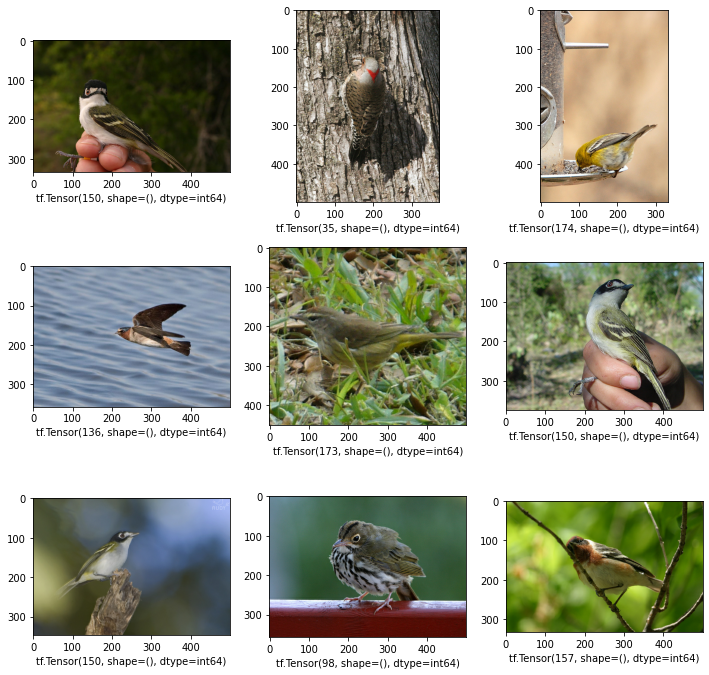

In [ ]:
plt.figure(figsize=(12,12))

c=0
for image,label in ds:              # Fetch Image and the label
  plt.subplot(330 + 1 + c)          # Format of displaying
  plt.imshow(image)                 # Show image at particular grid
  plt.xlabel(str(label))            # Give label as X-axis
  c+=1
  if(c>8):                          # SHow only 9 images
    break

Data Augmentation & Make List of X&Y train of all 3000+3033 Images as RGB images as a input and text labels as output

---

Data Augmentation
----------------

*   Resize the image( Such that Models doesn't get heavy)
*   Flip the Images
*   Adjust Brigthness of the Image
*   Rotate the Images



In [ ]:
# train and test dataset merge and split 6033 to 80-20 as train and validation

from sklearn.model_selection import train_test_split

# Define empty Lists
Ytrain=[]
Xtrain=[]
Ytest=[]
Xtest=[]

# Loop over training Images (3000 images)
for image,label in ds:

  # Y label extraction
  label = (int)(str(label).split('(')[1].split(',')[0])
  Ytrain.append(label)

  # X point extraction
  image = tf.image.resize(image, [32,32])
  image = ((np.uint8)(image))                 # convert to image matrix
  Xtrain.append(image)


  try:
    # Data Augmentation fliping, brightness, croping, rotation
    flipped = tf.image.flip_left_right(image)
    bright1 = tf.image.adjust_brightness(image, 0.4)
    bright2 = tf.image.adjust_brightness(image, 0.2)
    cropped = tf.image.central_crop(image, central_fraction=0.5)
    rotated1 = tf.image.rot90(image)
    rotated2 = tf.image.rot90(rotated1)
    rotated3 = tf.image.rot90(rotated2)

  
    flipped = tf.image.resize(flipped, [32,32])
    bright1 = tf.image.resize(bright1, [32,32])
    bright2 = tf.image.resize(bright2, [32,32])
    cropped = tf.image.resize(cropped, [32,32])
    rotated1 = tf.image.resize(rotated1, [32,32])
    rotated2 = tf.image.resize(rotated2, [32,32])
    rotated3 = tf.image.resize(rotated3, [32,32])

    Xtrain.append((np.uint8)(flipped))
    Xtrain.append((np.uint8)(bright1))
    Xtrain.append((np.uint8)(bright2))
    Xtrain.append((np.uint8)(cropped))
    Xtrain.append((np.uint8)(rotated1))
    Xtrain.append((np.uint8)(rotated2))
    Xtrain.append((np.uint8)(rotated3))

    Ytrain.append(label)
    Ytrain.append(label)
    Ytrain.append(label)
    Ytrain.append(label)
    Ytrain.append(label)
    Ytrain.append(label)
    Ytrain.append(label)
  except:
    pass


# Same logic for tesing images (3033 set of images)
for image,label in ds2:
  label = (int)(str(label).split('(')[1].split(',')[0])
  Ytrain.append(label)


  image = tf.image.resize(image, [32,32])
  image = ((np.uint8)(image))

  Xtrain.append(image)
  try:
    flipped = tf.image.flip_left_right(image)
    bright1 = tf.image.adjust_brightness(image, 0.4)
    bright2 = tf.image.adjust_brightness(image, 0.2)
    cropped = tf.image.central_crop(image, central_fraction=0.5)
    rotated1 = tf.image.rot90(image)
    rotated2 = tf.image.rot90(rotated1)
    rotated3 = tf.image.rot90(rotated2)
  
  
    flipped = tf.image.resize(flipped, [32,32])
    bright1 = tf.image.resize(bright1, [32,32])
    bright2 = tf.image.resize(bright2, [32,32])
    cropped = tf.image.resize(cropped, [32,32])
    rotated1 = tf.image.resize(rotated1, [32,32])
    rotated2 = tf.image.resize(rotated2, [32,32])
    rotated3 = tf.image.resize(rotated3, [32,32])
    
    Xtrain.append((np.uint8)(flipped))
    Xtrain.append((np.uint8)(bright1))
    Xtrain.append((np.uint8)(bright2))
    Xtrain.append((np.uint8)(cropped))
    Xtrain.append((np.uint8)(rotated1))
    Xtrain.append((np.uint8)(rotated2))
    Xtrain.append((np.uint8)(rotated3))
    
    Ytrain.append(label)
    Ytrain.append(label)
    Ytrain.append(label)
    Ytrain.append(label)
    Ytrain.append(label)
    Ytrain.append(label)
    Ytrain.append(label)
  except:
    pass

x=Xtrain
y=Ytrain
Xtrain=[]
Ytrain=[]

# Split the set in 80-20 for train-validation
Xtrain, Xtest, Ytrain, Ytest= train_test_split(x, y, test_size= 0.2, random_state=1)  


# Print uniqe numbe rof catgories of brids
label_uniq =set(Ytrain)
len(label_uniq)


200

Display the length for cross check and one image

---

Now we have proper datset to train a model:
* 200 Categories of birds
* X_train: 38611 Images
* Y_train: 38611 Labels
* X_test: 9653 Images
* Y_test: 9653 Labels

In [ ]:

Xtrain = np.reshape(Xtrain,(-1,32,32,3))
Xtest=np.reshape(Xtest,(-1,32,32,3))
Ytest = np.array(Ytest)
Ytrain = np.array(Ytrain)

Xtrain.shape,Xtest.shape, Ytest.shape, Ytrain.shape

((38611, 32, 32, 3), (9653, 32, 32, 3), (9653,), (38611,))

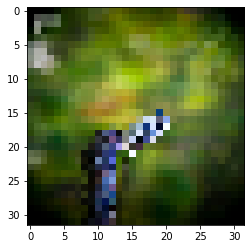

In [ ]:
# Plot one image after resizing
plt.imshow(Xtrain[0])

Image Preprossing before feed it in Model

---

* Image Normalisation
* Encoding of Labels: One hot encoding



In [ ]:
#normalising
Xtrain= Xtrain/255
Xtest= Xtest/255

In [ ]:
#implementing one hot encoding
from keras.utils.np_utils import to_categorical
Ytrain = to_categorical(Ytrain, num_classes=200)
Ytest = to_categorical(Ytest, num_classes=200)

Actual Model Training:

---



In [ ]:


'''
If want to do grid search for the optimal Params:
take
learn = [0.001, 0.01, 0.1, 0.3, 0.5, 0.8]
momentum = [0.4,0.5,0.6,0.7,0.8,0.9,1.0]

Loop over below code for each value of Learning_rate(learn)/ Momntum(mometum)
Compare accuracy in for of bar chart shown below
'''
#creating model object
model=Sequential()

# Layer addition
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu")) # change 32 to 32
model.add(BatchNormalization())


model.add(Conv2D(128, (5, 5), strides=2, padding='same', activation="relu"))
model.add(BatchNormalization())


model.add(Conv2D(64, (3, 3), strides=2, padding='same', activation="relu"))
model.add(BatchNormalization()) 


model.add(Flatten())
model.add(Dense(512, activation="relu"))


model.add(Dropout(0.2)) 
model.add(Dense(200,activation="softmax"))

opt = tf.keras.optimizers.SGD(learning_rate = 0.1)

model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])
history = model.fit(Xtrain,Ytrain,batch_size= 128,epochs= 30 ,validation_data=(Xtest,Ytest))

temp = model.evaluate(Xtrain,Ytrain), model.evaluate(Xtest,Ytest)

Epoch 1/30
302/302 [==============================] - 48s 62ms/step - loss: 5.2850 - accuracy: 0.0165 - val_loss: 5.1608 - val_accuracy: 0.0182
Epoch 2/30
302/302 [==============================] - 17s 58ms/step - loss: 4.4416 - accuracy: 0.0738 - val_loss: 4.4269 - val_accuracy: 0.0799
Epoch 3/30
302/302 [==============================] - 17s 57ms/step - loss: 3.8167 - accuracy: 0.1583 - val_loss: 4.2370 - val_accuracy: 0.1187
Epoch 4/30
302/302 [==============================] - 17s 57ms/step - loss: 3.1168 - accuracy: 0.2844 - val_loss: 3.5692 - val_accuracy: 0.2249
Epoch 5/30
302/302 [==============================] - 17s 57ms/step - loss: 2.3580 - accuracy: 0.4372 - val_loss: 3.5445 - val_accuracy: 0.2654
Epoch 6/30
302/302 [==============================] - 17s 57ms/step - loss: 1.6379 - accuracy: 0.5993 - val_loss: 3.2994 - val_accuracy: 0.3201
Epoch 7/30
302/302 [==============================] - 17s 57ms/step - loss: 1.0629 - accuracy: 0.7355 - val_loss: 3.2595 - val_accuracy:

In [ ]:
# Plot model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          73792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

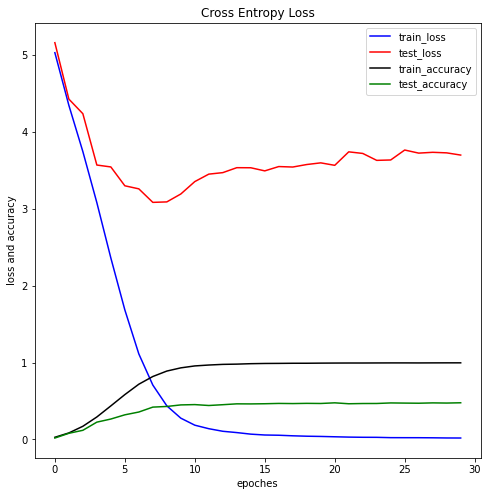

In [ ]:
# Loss- Accuracy curve for model training

plt.figure(figsize=(8,8))
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train_loss')
plt.plot(history.history['val_loss'], color='red', label='test_loss')
plt.plot(history.history['accuracy'], color='black', label='train_accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='test_accuracy')
plt.xlabel('epoches')
plt.ylabel('loss and accuracy')

#plt.ylim(0,1)
plt.savefig('loss-curve')
plt.legend()

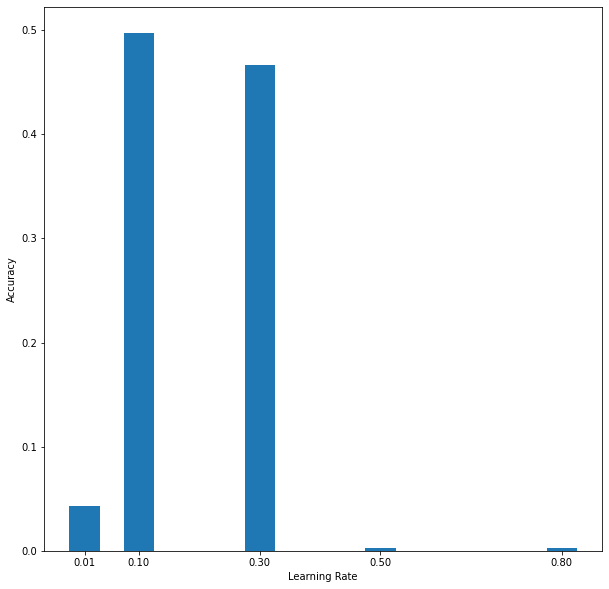

In [ ]:
# Plot Example for searching optimal Learning Rate

plt.figure(figsize=(10, 10))
plt.bar(learn, accu_lr, width=0.05)
plt.xticks(learn)
#plt.yticks(np.arange(0, 1, 0.1))
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

plt.savefig('learnRate')
plt.show()

Links:
https://www.tensorflow.org/datasets/overview 


https://www.tensorflow.org/tutorials/images/data_augmentation